In [92]:
## Libraries to be used 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pd.read_csv('cleaned.csv')
data.head(5)

,Unnamed: 0,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,GenderBinary
0,0,0,33,Male,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,1
1,1,1,17,Male,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,1
2,2,2,35,Male,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,1
3,3,3,37,Male,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,1
4,4,4,46,Male,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,1


---
### Lung Cancer can happen in any age. Lets see which age group has highest number of occurance of the disease ?!

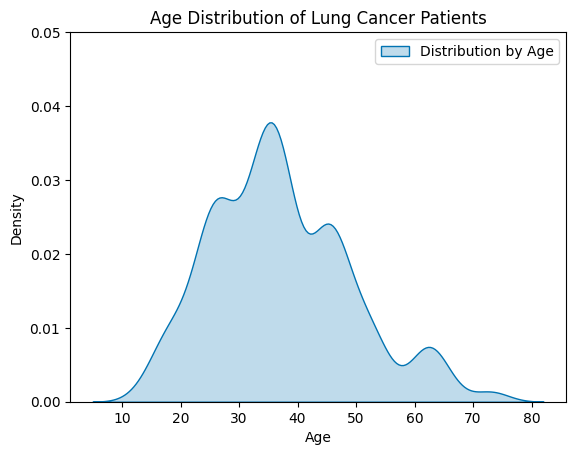

In [174]:
## Lets see which age distribution has more number of the lung cancer patients
sns.kdeplot(x = 'Age', data = data, fill = True, label = 'Distribution by Age')
plt.ylim(0,0.05)
plt.legend()
plt.title("Age Distribution of Lung Cancer Patients")
plt.show()

/var/folders/bt/9_3kc80d4jq8sv8fv_c7d_fr0000gn/T/ipykernel_66778/2603386231.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageGroupping = data.groupby('AgeRange').size().reset_index() ## Counting the total cases in each groups


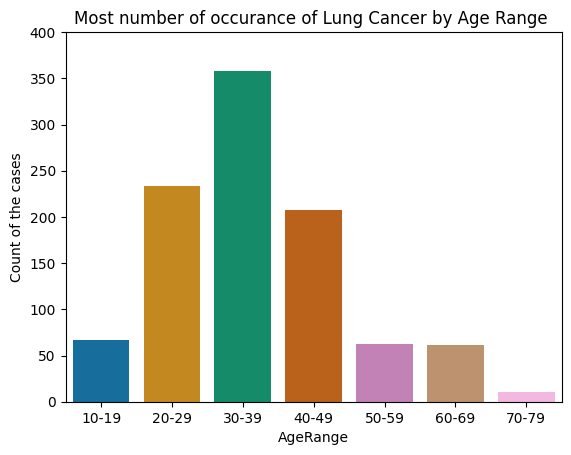

In [94]:
### First lets divide the age group into the range each from 10-14 all the way to 70-80(This contains the oldest patient record)
labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79'] ## Age Groups 
bins = [10, 20, 30, 40, 50, 60, 70, 80] ## Age 

data['AgeRange'] = pd.cut(data['Age'], bins = bins,labels=labels ) ## Creating the new Age Range column by fitting the data
ageGroupping = data.groupby('AgeRange').size().reset_index() ## Counting the total cases in each groups
sns.barplot(x = 'AgeRange', y = 0, hue = 'AgeRange', data = ageGroupping) ## Making a new barplot
plt.title('Most number of occurance of Lung Cancer by Age Range ') ## Setting the title
plt.ylabel("Count of the cases") 
plt.ylim(0,400)
plt.show()

---

### Lets analyze Lung Cancer Cases by Age Group and Severity and conclude which age group is more victimized?!

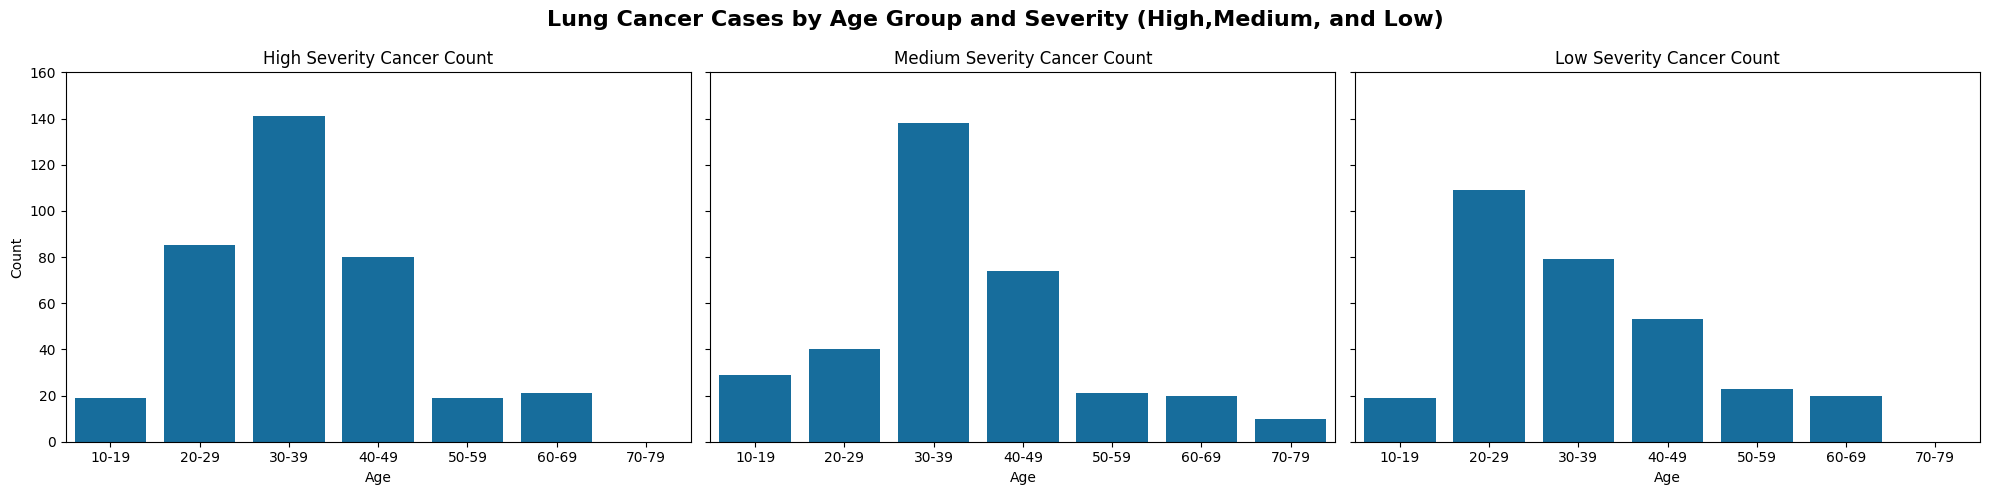

In [95]:
ageRangeSeverity = data.groupby('Level')['AgeRange'].value_counts().reset_index() ## Distribution of the data as per the age range
extremeLevel = ageRangeSeverity[ageRangeSeverity['Level'] == 'High'] ## Extreme Level 
moderateSevere = ageRangeSeverity[ageRangeSeverity['Level'] == 'Medium'] ## Medium Level
normalLevel = ageRangeSeverity[ageRangeSeverity['Level'] == 'Low'] ## Normal Level


fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey= True) ### Used for multiple plotting

def plottingAsPerSeverity(x, y, data, ylabel, xlabel, title, axes): ## Function to plot the whole distributed data
    sns.set_palette('colorblind') ## Setting the palette 
    sns.barplot(x=x, y=y, data=data, ax=axes, hue = None)
    
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.set_ylim(0,160)

# Correct titles for each plot
plottingAsPerSeverity('AgeRange', 'count', extremeLevel, 'Count', 'Age', 'High Severity Cancer Count', ax[0])
plottingAsPerSeverity('AgeRange', 'count', moderateSevere, 'Count', 'Age', 'Medium Severity Cancer Count', ax[1])
plottingAsPerSeverity('AgeRange', 'count', normalLevel, 'Count', 'Age', 'Low Severity Cancer Count', ax[2])
fig.suptitle('Lung Cancer Cases by Age Group and Severity (High,Medium, and Low)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Based on the figure, we can conclude that the 30–39 age group has the highest number of lung cancer cases across all three severity levels — High, Medium, and Low.

---

### Lets do the Gender Based Analysis of the disease 


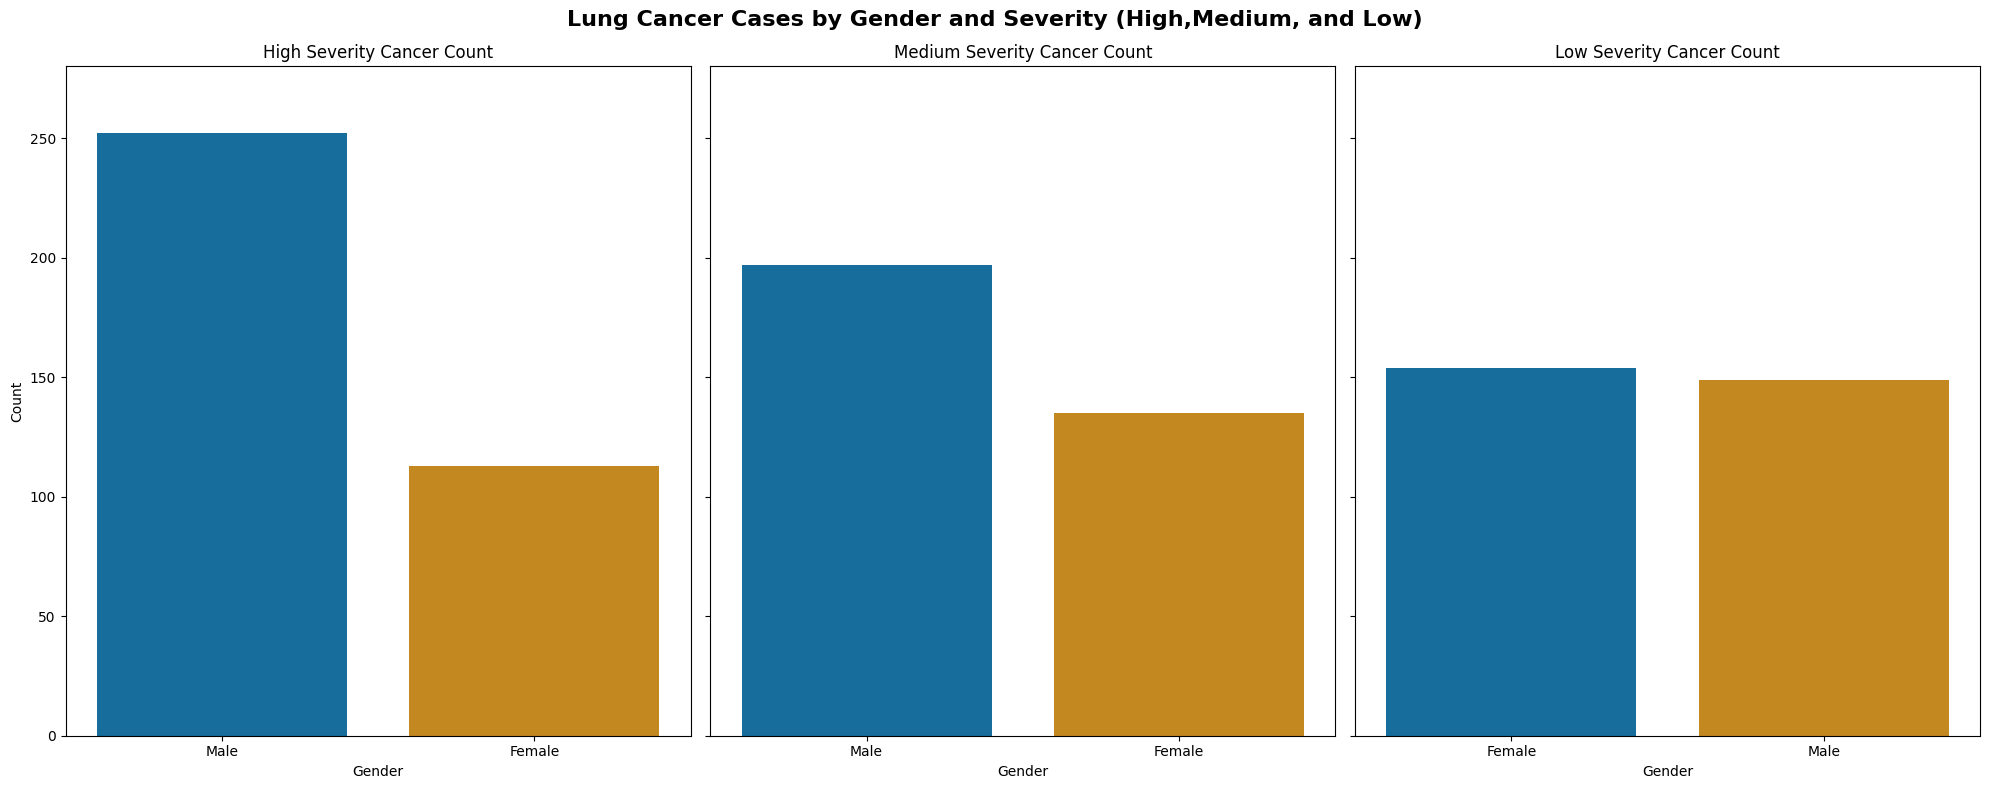

In [96]:
genderData = data[['Gender','Level']] ## Extracting the data only containing the gender and the severity level 
grouppedBySeverity = data.groupby('Level')['Gender'].value_counts() ##EDA 
grouppedBySeverity = grouppedBySeverity.reset_index() ##Finalized Data
extremeLevel = grouppedBySeverity[grouppedBySeverity['Level'] == 'High'] ## Extreme Level 
moderateSevere = grouppedBySeverity[grouppedBySeverity['Level'] == 'Medium'] ## Medium Level
normalLevel = grouppedBySeverity[grouppedBySeverity['Level'] == 'Low'] ## Normal Level

fig, ax = plt.subplots(1, 3, figsize=(20, 8), sharey= True) ## Plotting as per the severity 
def genderAndCancerSeverity(x , y , hue, data, title, xlabel, ylabel, axes):
    sns.barplot(x = x, y =y, hue = hue, data= data, ax = axes)
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_ylim(0,280)

genderAndCancerSeverity('Gender','count', 'Gender', extremeLevel, 'High Severity Cancer Count','Gender', 'Count',ax[0])
genderAndCancerSeverity('Gender','count', 'Gender', moderateSevere, 'Medium Severity Cancer Count','Gender', 'Count',ax[1])
genderAndCancerSeverity('Gender','count', 'Gender', normalLevel, 'Low Severity Cancer Count','Gender', 'Count',ax[2])
fig.suptitle('Lung Cancer Cases by Gender and Severity (High,Medium, and Low)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## From the plot, we can clearly see that the majority of lung cancer cases in each severity category — High, Medium, and Low — are reported among male patients.

---

# How lifestyle affects the severity ?!
## Lets see for the smokers


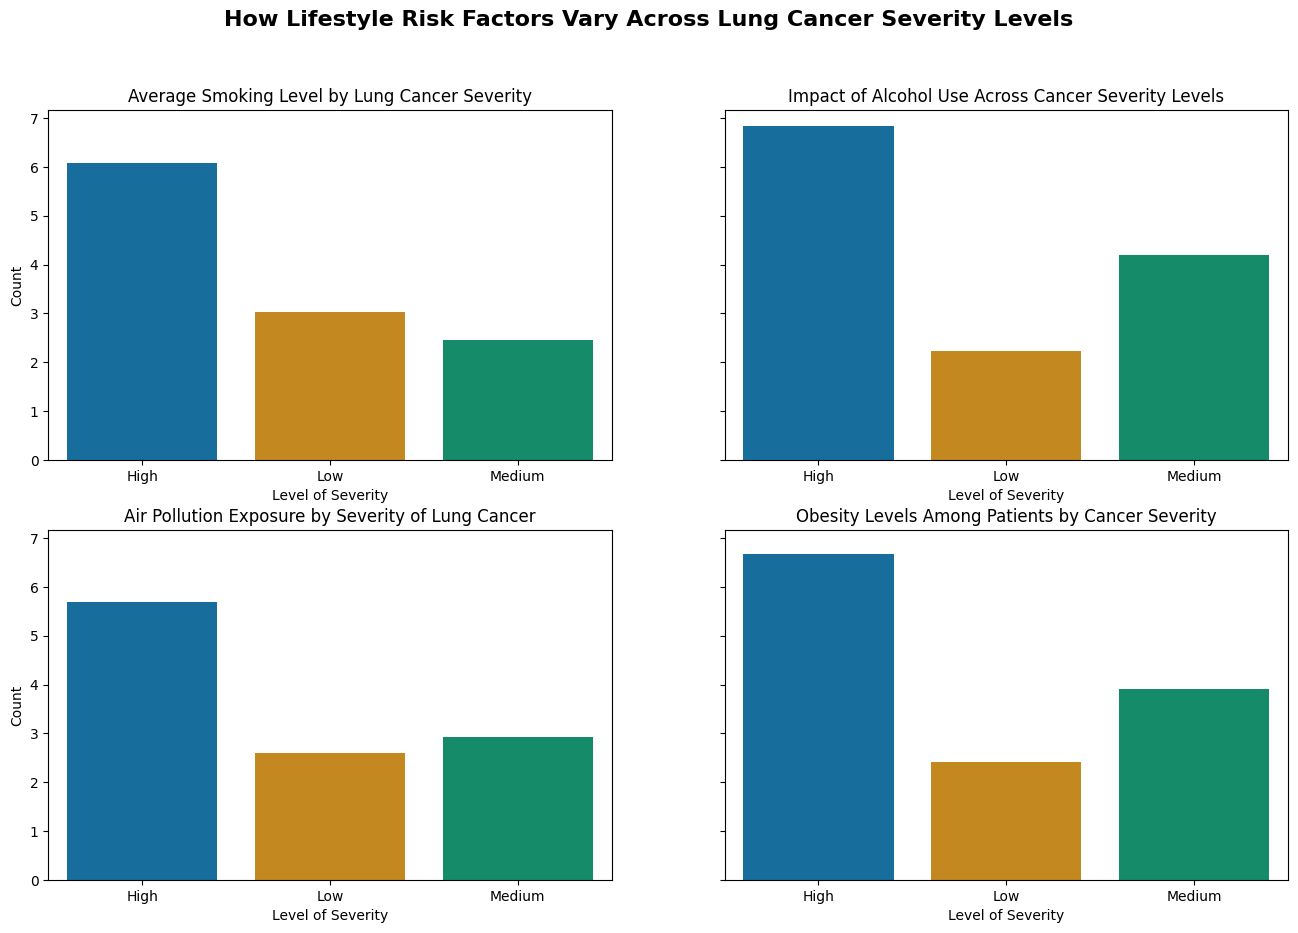

In [154]:
smokingData = data.groupby('Level')['Smoking'].mean().reset_index() ## SmokingData
alcoholData = data.groupby('Level')['Alcohol use'].mean().reset_index()
airData = data.groupby('Level')['Air Pollution'].mean().reset_index()
obesityData = data.groupby('Level')['Obesity'].mean().reset_index()

fig, ax = plt.subplots(2, 2, figsize=(16, 10), sharey= True)
def lifestyleFactor(x,y, hue, data, axes, xlabel,ylabel,title):
    sns.barplot(x = x, y = y, hue = hue, ax = axes, data = data)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)

lifestyleFactor('Level','Smoking', 'Level', smokingData, ax[0][0],'Level of Severity','Count','Average Smoking Level by Lung Cancer Severity')
lifestyleFactor('Level','Alcohol use', 'Level', alcoholData, ax[0][1],'Level of Severity','Count','Impact of Alcohol Use Across Cancer Severity Levels')
lifestyleFactor('Level','Air Pollution', 'Level', airData, ax[1][0],'Level of Severity','Count','Air Pollution Exposure by Severity of Lung Cancer')
lifestyleFactor('Level','Obesity', 'Level', obesityData, ax[1][1],'Level of Severity','Count','Obesity Levels Among Patients by Cancer Severity')
fig.suptitle('How Lifestyle Risk Factors Vary Across Lung Cancer Severity Levels', fontsize = 16, fontweight = 'bold')
plt.show()

##

### From the above plots, it's evident that lifestyle factors like smoking, alcohol use, air pollution exposure, and obesity are all significantly higher among patients with high severity lung cancer. This suggests a strong correlation between unhealthy lifestyle choices and the likelihood of developing more severe forms of the disease.


---
### Smoking and alcohol consumption has been one of the major reason behind vulnerable body disorder such as (Lung Cancer). Lets see the trend of smoking and Alcohol consumption based on the age 

/var/folders/bt/9_3kc80d4jq8sv8fv_c7d_fr0000gn/T/ipykernel_66778/2442329156.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageWiseSmoking = smokerAlocholByAge.groupby('AgeRange')['Smoking'].mean().reset_index()
/var/folders/bt/9_3kc80d4jq8sv8fv_c7d_fr0000gn/T/ipykernel_66778/2442329156.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageWiseAlcohol = smokerAlocholByAge.groupby('AgeRange')['Alcohol use'].mean().reset_index()


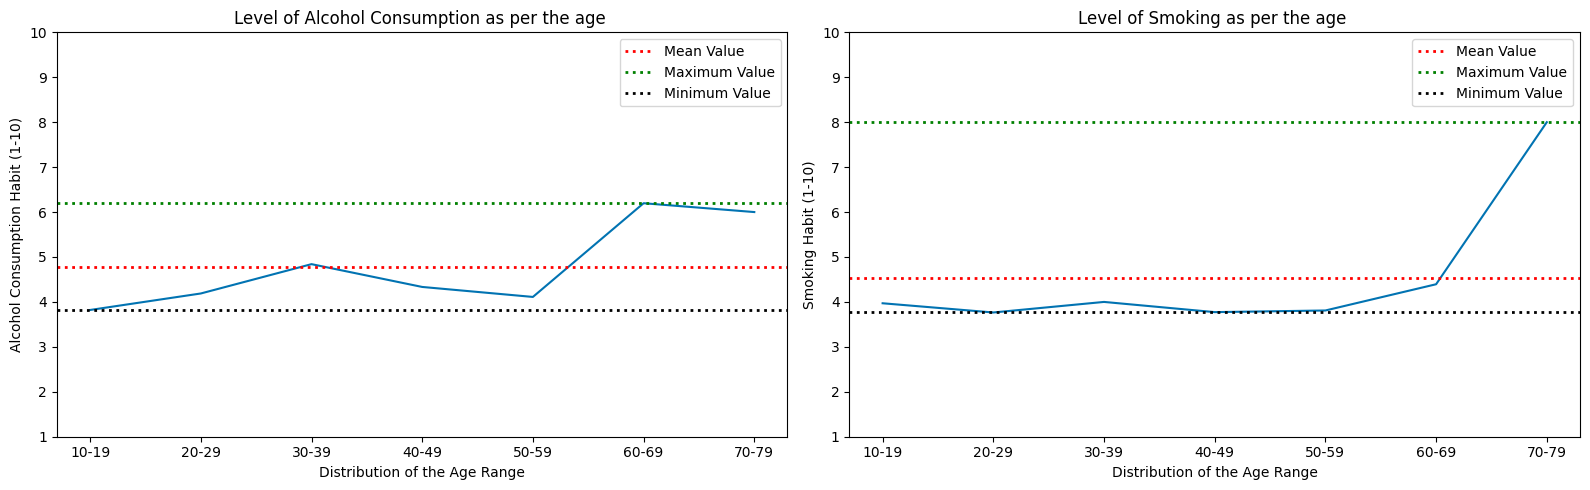

In [98]:
### Age, Smoking and Alcohol Consumption Category 
smokerAlocholByAge = data[['AgeRange','Smoking','Alcohol use']] 
ageWiseSmoking = smokerAlocholByAge.groupby('AgeRange')['Smoking'].mean().reset_index()
meanSmoking = ageWiseSmoking['Smoking'].mean()
maxSmoking = ageWiseSmoking['Smoking'].max()
minSmoking = ageWiseSmoking['Smoking'].min()
ageWiseAlcohol = smokerAlocholByAge.groupby('AgeRange')['Alcohol use'].mean().reset_index()
meanAlcohol = ageWiseAlcohol['Alcohol use'].mean()
maxAlcohol = ageWiseAlcohol['Alcohol use'].max()
minAlcohol = ageWiseAlcohol['Alcohol use'].min()
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
def plottinAlcoSmoke(x , y , data, title, xlabel, ylabel, axes, ylim1, ylim2, mean, max, min):
    sns.lineplot(x = x, y = y, data = data , ax = axes)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.axhline(y = mean, color = 'red', linestyle = ':', linewidth = 2, label = 'Mean Value')
    axes.axhline(y = max, color = 'green', linestyle = ':', linewidth = 2, label = 'Maximum Value')
    axes.axhline(y = min, color = 'black', linestyle = ':', linewidth = 2, label = 'Minimum Value')
    axes.set_title(title)
    axes.legend()
    axes.set_ylim(ylim1,ylim2)

plottinAlcoSmoke('AgeRange','Alcohol use', ageWiseAlcohol,'Level of Alcohol Consumption as per the age ', 'Distribution of the Age Range', 'Alcohol Consumption Habit (1-10)', ax[0], 1,10, meanAlcohol,maxAlcohol,minAlcohol)
plottinAlcoSmoke('AgeRange','Smoking', ageWiseSmoking,'Level of Smoking as per the age ', 'Distribution of the Age Range', 'Smoking Habit (1-10)', ax[1], 1,10, meanSmoking, maxSmoking,minSmoking)
plt.tight_layout()
plt.show()


## Alcohol consumption peaks between 60–69, while smoking habits sharply increase in the 70–79 range. Both behaviors show above-average levels in older age groups, which may suggest accumulated risk over time.



---


## How Symptom Severity Varies Across Different Lung Cancer Stages

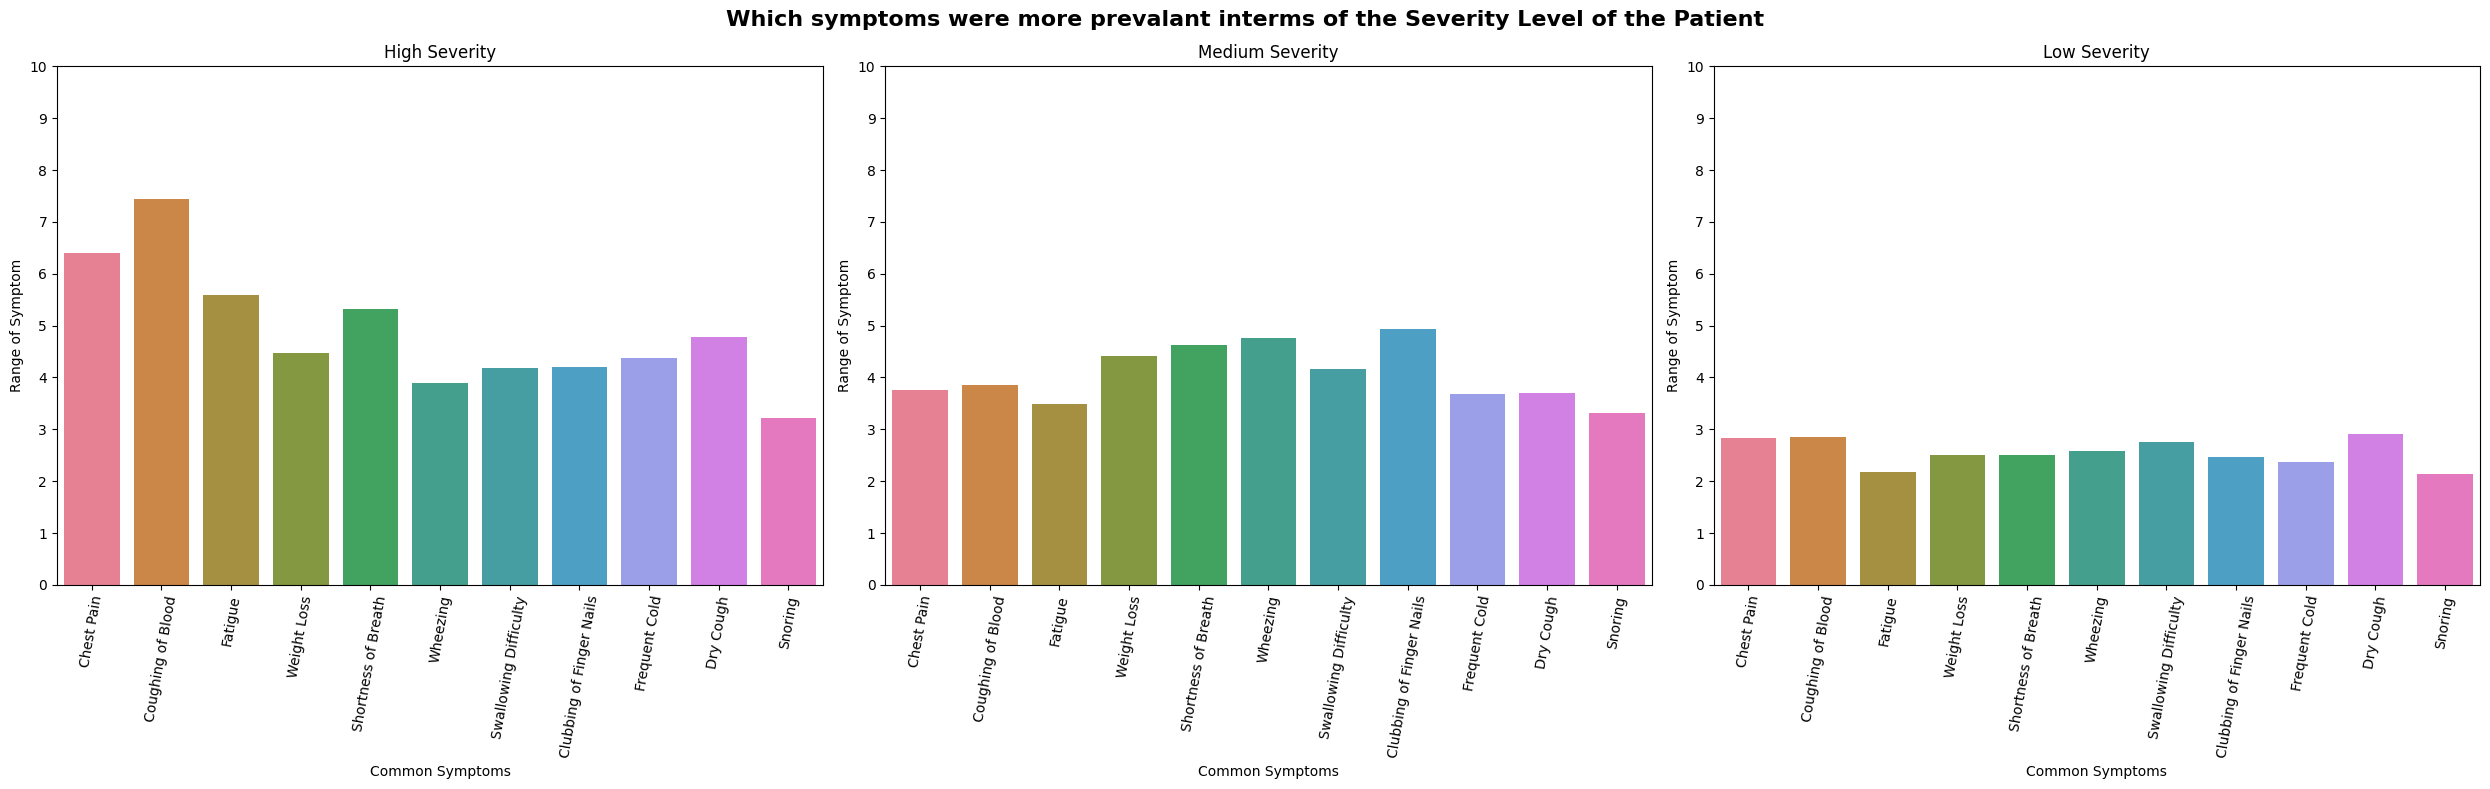

In [135]:
### Symptoms based severity analysis 
symptomsSeverity = data[['Level','Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']]
grouppedSeverity = symptomsSeverity.groupby('Level').mean().reset_index()
high = grouppedSeverity[grouppedSeverity['Level'] == 'High']
medium = grouppedSeverity[grouppedSeverity['Level'] == 'Medium']
low = grouppedSeverity[grouppedSeverity['Level'] == 'Low']
fig, ax = plt.subplots(1,3,figsize =(25,8))
def symptomsAndSeverity(data, axes, title, xlabel):
    sns.barplot(data, ax = axes)
    axes.set_title(title)
    axes.tick_params(axis='x', rotation=80)
    axes.set_yticks(np.arange(0,11,1))
    axes.set_xlabel(xlabel)
    axes.set_ylabel("Range of Symptom")

symptomsAndSeverity(high,ax[0],'High Severity', 'Common Symptoms')
symptomsAndSeverity(medium,ax[1],'Medium Severity', 'Common Symptoms')
symptomsAndSeverity(low,ax[2],'Low Severity', 'Common Symptoms')
plt.suptitle("Which symptoms were more prevalant interms of the Severity Level of the Patient",fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()


### From the analysis, we observe that symptoms like Chest Pain and Coughing of Blood are significantly more severe in High-level cancer patients compared to those with Medium or Low severity.

---

# Summary of EDA Insights
## Most severe lung cancer cases are observed in male patients aged 30–39.
## Lifestyle factors like smoking, alcohol use, and obesity show a clear increase in high-severity patients.
## Certain symptoms (e.g., Coughing of Blood, Chest Pain) are highly prevalent in severe cases.
## Age has a moderate relationship with lifestyle habits, which may indirectly influence severity.


---